In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read files
file_name_data = "clinicaltrial_data.csv"
file_name_drugs = "mouse_drug_data.csv"

file_path_data = os.path.join("raw_data",file_name_data)
file_path_drugs = os.path.join("raw_data",file_name_drugs)

clinical_trials_df = pd.read_csv(file_path_data)
drugs_df = pd.read_csv(file_path_drugs)

view_clinical_trials = clinical_trials_df.head()
view_drugs = drugs_df.head()

print(view_clinical_trials)
print(view_drugs)

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn


In [3]:
#merge dataframes
merged_df = pd.merge(clinical_trials_df,drugs_df,on='Mouse ID')
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
#find mean tumor volume, mean number of metastic sites, and total number of surviving mice over time for each treatment
groubpy_drug_time_tumor_volume = merged_df.groupby(by = ["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]
groupby_drug_time_num_sites = merged_df.groupby(by = ["Drug","Timepoint"]).mean()["Metastatic Sites"]
groupby_drug_time_num_mice = merged_df.groupby(by = ["Drug","Timepoint"]).size()

#save results to dataframe
results = pd.DataFrame()
results["Tumor Volume (mm3)"] = groubpy_drug_time_tumor_volume
results["Metastatic Sites"] = groupby_drug_time_num_sites
results["Mouse Count"] = groupby_drug_time_num_mice
results.head()

Tumor Volume (mm3)  Metastatic Sites  Mouse Count
Drug      Timepoint                                                   
Capomulin 0                   45.000000          0.000000           25
          5                   44.266086          0.160000           25
          10                  43.084291          0.320000           25
          15                  42.064317          0.375000           24
          20                  40.716325          0.652174           23

In [5]:
#get standard error for tumor volume and number of metastic sites over time for each treatment
results["Tumor Volume SEM"] = merged_df.groupby(by = ["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]
results["Metastatic Sites SEM"] = merged_df.groupby(by = ["Drug","Timepoint"]).sem()["Metastatic Sites"]
results.head()

Tumor Volume (mm3)  Metastatic Sites  Mouse Count  \
Drug      Timepoint                                                      
Capomulin 0                   45.000000          0.000000           25   
          5                   44.266086          0.160000           25   
          10                  43.084291          0.320000           25   
          15                  42.064317          0.375000           24   
          20                  40.716325          0.652174           23   

                     Tumor Volume SEM  Metastatic Sites SEM  
Drug      Timepoint                                          
Capomulin 0                  0.000000              0.000000  
          5                  0.448593              0.074833  
          10                 0.702684              0.125433  
          15                 0.838617              0.132048  
          20                 0.909731              0.161621

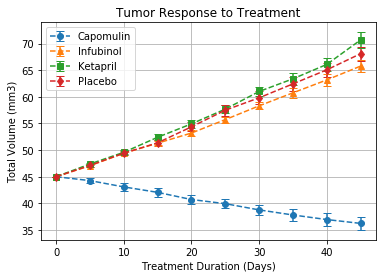

In [6]:
#plot tumor volume changes over time for each treatment
#user scatter plot with error bars
time = [0,5,10,15,20,25,30,35,40,45]
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
marker_list = ['o','^','s','d']
handles = []
labels = []
for i in range(len(drug_list)):
    handle = plt.errorbar(time,results.loc[drug_list[i]]["Tumor Volume (mm3)"],yerr = results.loc[drug_list[i]]["Tumor Volume SEM"],linestyle = '--',capsize = 4,marker=marker_list[i])
    handles.append(handle)
    labels.append(drug_list[i])
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Total Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.grid(True)
plt.legend(handles,labels)
plt.show()

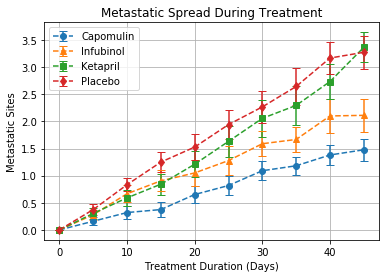

In [7]:
#plot number of metastic sites over time for each treatment
#user scatter plot with error bars
handles = []
labels = []
for i in range(len(drug_list)):
    handle = plt.errorbar(time,results.loc[drug_list[i]]["Metastatic Sites"],yerr = results.loc[drug_list[i]]["Metastatic Sites SEM"],linestyle = '--',capsize = 4,marker=marker_list[i])
    handles.append(handle)
    labels.append(drug_list[i])
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Spread During Treatment')
plt.grid(True)
plt.legend(handles,labels)
plt.show()

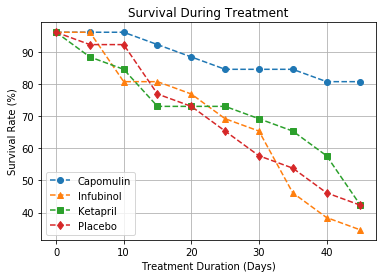

In [8]:
#plot number of surviving mice over time for each treatment
#user scatter plot with error bars
handles = []
labels = []
survival_rate = results["Mouse Count"]/max(results["Mouse Count"])*100
for i in range(len(drug_list)):
    handle, = plt.plot(time,survival_rate.loc[drug_list[i]],linestyle = '--',marker=marker_list[i])
    handles.append(handle)
    labels.append(drug_list[i])
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')
plt.grid(True)
plt.legend(handles,labels)
plt.show()

In [9]:
#find total % tumor volume change for each treatment over 45 day study
for i in range(len(drug_list))

In [10]:
#plot % tumor volume change for each treament over 45 day study
#use bar graph